## Regresión lineal - Predicción la nota final de los estudiantes

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns 
from sklearn.compose import ColumnTransformer

### Importo el dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/students/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### EDA - Análisis  exploratorio de los datos

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.shape # tamaño de filas y columnas

(395, 33)

In [6]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'}) # estadísticos básicos 

,count,mean,std,min,25%,50%,75%,max
age,395.000000,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.000000,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.000000,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.000000,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.000000,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.000000,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.000000,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.000000,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.000000,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.000000,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


In [7]:
df.duplicated().sum() # visualizo si hay duplicados

0

In [8]:
df.isna().sum() # visualizo si hay nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
df.dtypes.value_counts() # tipo de datos

object    17
int64     16
dtype: int64

In [10]:
for i in list(df.columns):
    
    # get a list of unique values
    
    n = df[i].unique()
    print(i)
    print(n)
    #print('\n')
   

school
['GP' 'MS']
sex
['F' 'M']
age
[18 17 15 16 19 22 20 21]
address
['U' 'R']
famsize
['GT3' 'LE3']
Pstatus
['A' 'T']
Medu
[4 1 3 2 0]
Fedu
[4 1 2 3 0]
Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Fjob
['teacher' 'other' 'services' 'health' 'at_home']
reason
['course' 'other' 'home' 'reputation']
guardian
['mother' 'father' 'other']
traveltime
[2 1 3 4]
studytime
[2 3 1 4]
failures
[0 3 2 1]
schoolsup
['yes' 'no']
famsup
['no' 'yes']
paid
['no' 'yes']
activities
['no' 'yes']
nursery
['yes' 'no']
higher
['yes' 'no']
internet
['no' 'yes']
romantic
['no' 'yes']
famrel
[4 5 3 1 2]
freetime
[3 2 4 1 5]
goout
[4 3 2 1 5]
Dalc
[1 2 5 3 4]
Walc
[1 3 2 4 5]
health
[3 5 1 2 4]
absences
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


### Análisis de la variable target "G3"

In [11]:
df['G3'].value_counts().sort_index(ascending=True) # cantidad de valores

0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64

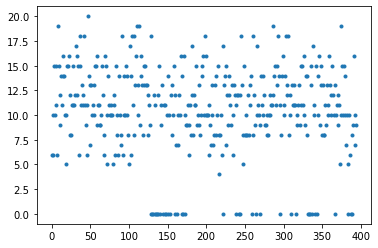

In [12]:
plt.plot(df['G3'],'.')

<AxesSubplot:xlabel='G3', ylabel='count'>

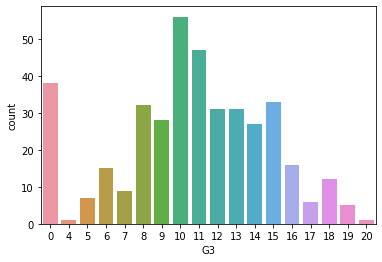

In [13]:
sns.countplot(data=df, x='G3') # distribución

**Elimino valores atípicos - "ceros" en la variable tardeg G3**

In [14]:
df.shape

(395, 33)

In [15]:
df_index=df[df["G3"] == 0].index
df=df.drop(df_index)
df.shape

(357, 33)

In [16]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
age,357.000000,16.655462,1.268262,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,357.000000,2.795518,1.093999,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,357.000000,2.546218,1.084217,0.000000,2.000000,3.000000,3.000000,4.000000
traveltime,357.000000,1.431373,0.686075,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,357.000000,2.042017,0.831895,1.000000,1.000000,2.000000,2.000000,4.000000
failures,357.000000,0.271709,0.671750,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,357.000000,3.955182,0.885721,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,357.000000,3.246499,1.011601,1.000000,3.000000,3.000000,4.000000,5.000000
goout,357.000000,3.098039,1.090779,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,357.000000,1.495798,0.919886,1.000000,1.000000,1.000000,2.000000,5.000000


**Defino que se aprueba con nota mayor a 11**

In [17]:
df[df['G3']>11].shape # alumnos aprobados

(162, 33)

In [18]:
df[df['G3']<11].shape # alumnos desaprobados

(148, 33)

## Selecciono para analizar variables que pueden ser predictivas 

### studytime

In [19]:
df['studytime'].value_counts()

2    182
1     92
3     59
4     24
Name: studytime, dtype: int64

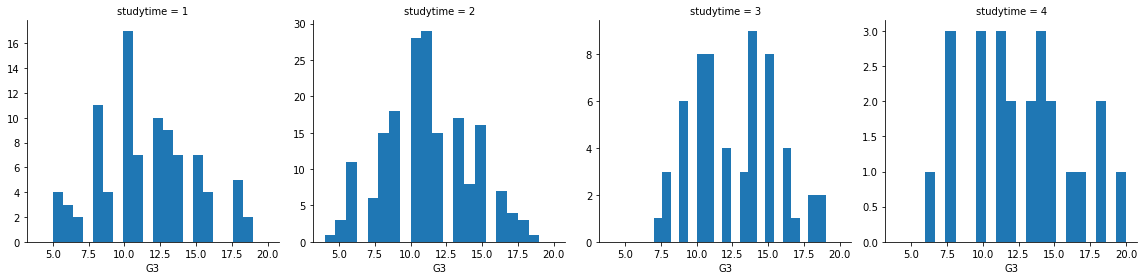

In [20]:
g = sns.FacetGrid(df, col='studytime', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

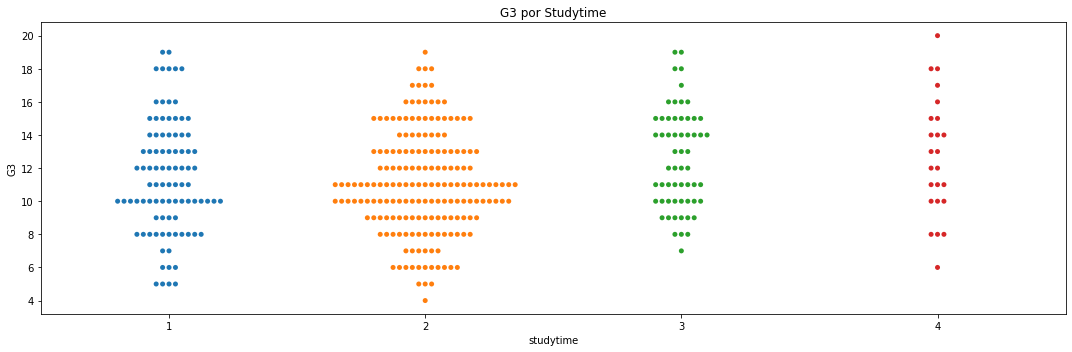

In [21]:
#cuanto más estudia mejores notas obtienen

plt.figure(figsize=(15,5))
sns.swarmplot(x='studytime', y='G3', data=df).set_title('G3 por Studytime')
plt.tight_layout()
plt.show()


<AxesSubplot:>

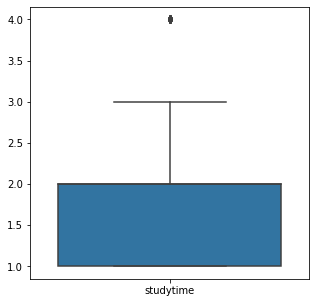

In [22]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = df[['studytime']])

### failures

In [23]:
df['failures'].value_counts()

0    294
1     40
2     12
3     11
Name: failures, dtype: int64

<AxesSubplot:xlabel='failures', ylabel='count'>

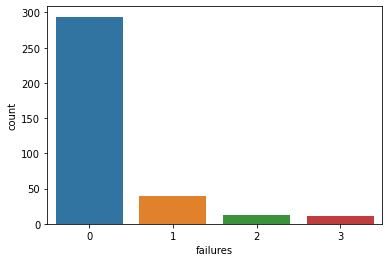

In [24]:
sns.countplot(data=df, x='failures')

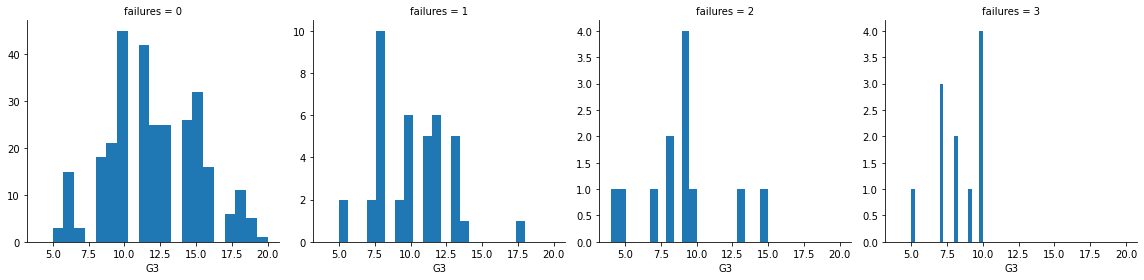

In [25]:
g = sns.FacetGrid(df, col='failures', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)
#Mientras más reprobaciones tenga menos nota obtienen

C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


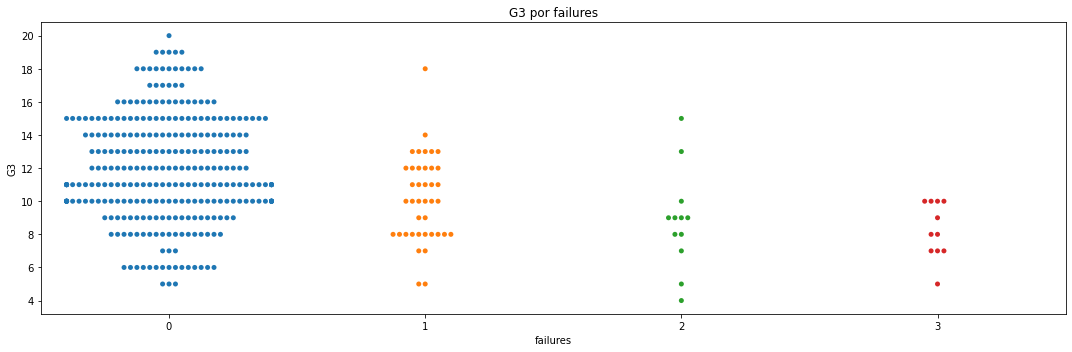

In [26]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='failures', y='G3', data=df).set_title('G3 por failures')
plt.tight_layout()
plt.show()


<AxesSubplot:>

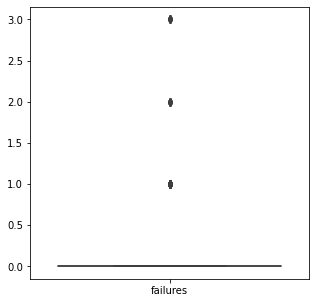

In [27]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = df[['failures']])

### higher

In [28]:
df['higher'].value_counts() #NO ES PROPORCIONAL LA CANTIDAD

yes    343
no      14
Name: higher, dtype: int64

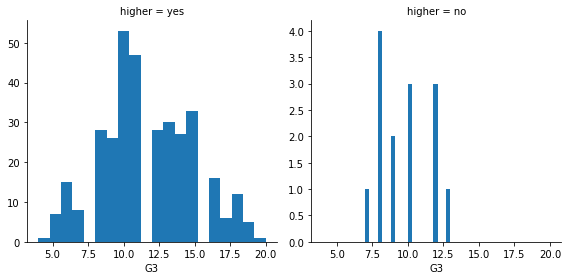

In [29]:
g = sns.FacetGrid(df, col='higher', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)
# Los que no quieren una carrera universitaria tienen baja nota

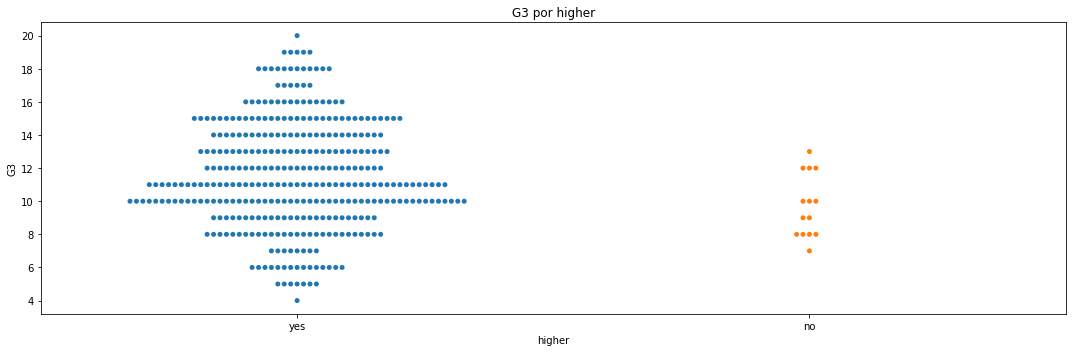

In [30]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='higher', y='G3', data=df).set_title('G3 por higher')
plt.tight_layout()
plt.show()

### schoolsup

In [31]:
df['schoolsup'].value_counts() 

no     307
yes     50
Name: schoolsup, dtype: int64

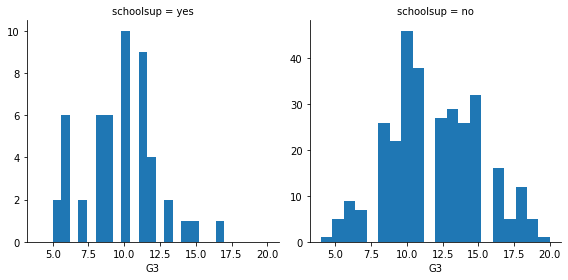

In [32]:
g = sns.FacetGrid(df, col='schoolsup', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)
#los que toman clases de apoyo son los que tienden a tener notas bajas

### famsup

In [33]:
df['famsup'].value_counts() 

yes    219
no     138
Name: famsup, dtype: int64

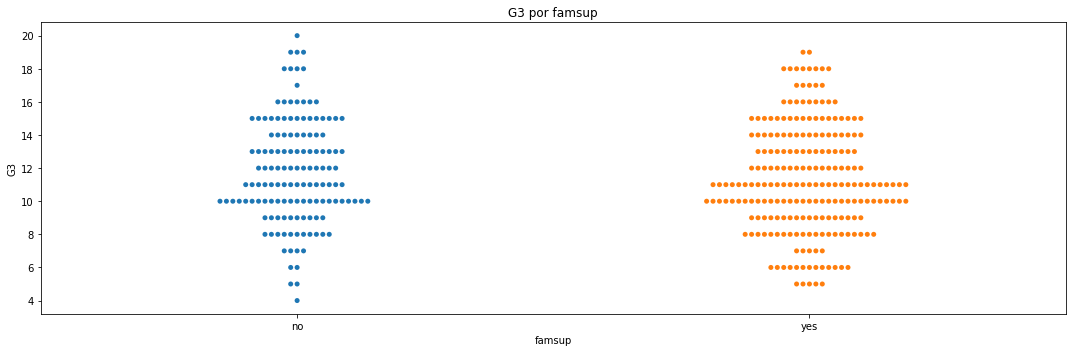

In [34]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='famsup', y='G3', data=df).set_title('G3 por famsup')
plt.tight_layout()
plt.show()
#Los que no teinen apoyo educativo familiar tienden a tener notas medias

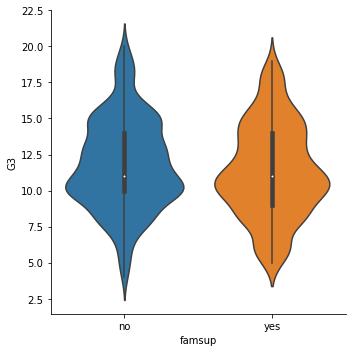

In [35]:
sns.catplot(x = 'famsup', y ='G3' , data = df, kind = "violin", bw = 0.25);

### paid

In [36]:
df['paid'].value_counts()

no     184
yes    173
Name: paid, dtype: int64

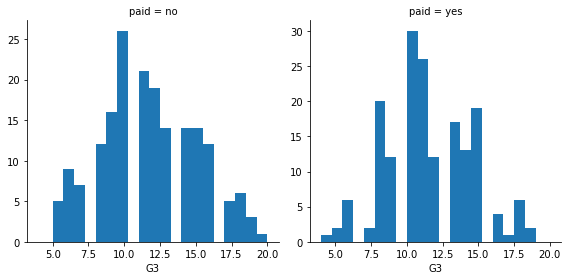

In [37]:
g = sns.FacetGrid(df, col='paid', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)
#los que pagan por clases extras tienen a apruebar

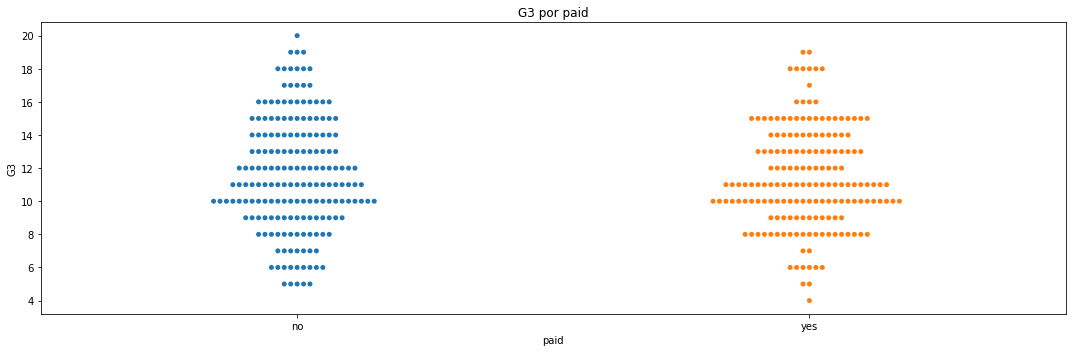

In [38]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='paid', y='G3', data=df).set_title('G3 por paid')
plt.tight_layout()
plt.show()


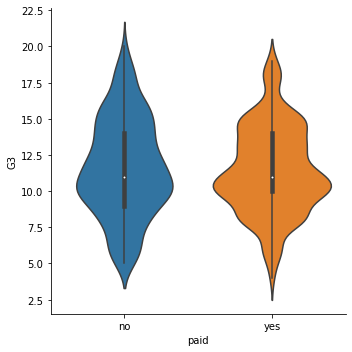

In [39]:
sns.catplot(x = 'paid', y ='G3' , data = df, kind = "violin", bw = 0.25);
#Los que si pagan por clases extras tieden a tener mejores notas

### absences

In [40]:
df['absences'].value_counts()

0     77
2     65
4     53
6     31
8     22
10    17
14    12
12    12
3      8
16     7
7      7
5      5
18     5
20     4
11     3
9      3
13     3
15     3
22     3
1      3
38     1
30     1
40     1
23     1
19     1
28     1
75     1
21     1
24     1
56     1
26     1
54     1
25     1
17     1
Name: absences, dtype: int64

C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of 

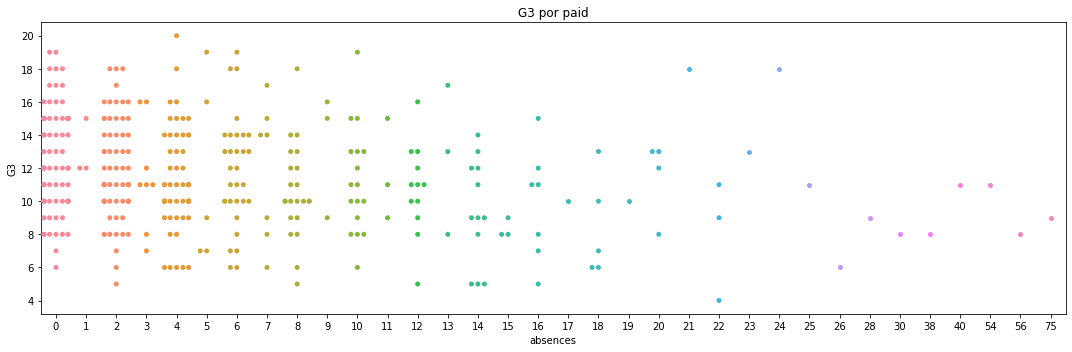

In [41]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='absences', y='G3', data=df).set_title('G3 por paid')
plt.tight_layout()
plt.show()

<Figure size 1080x360 with 0 Axes>

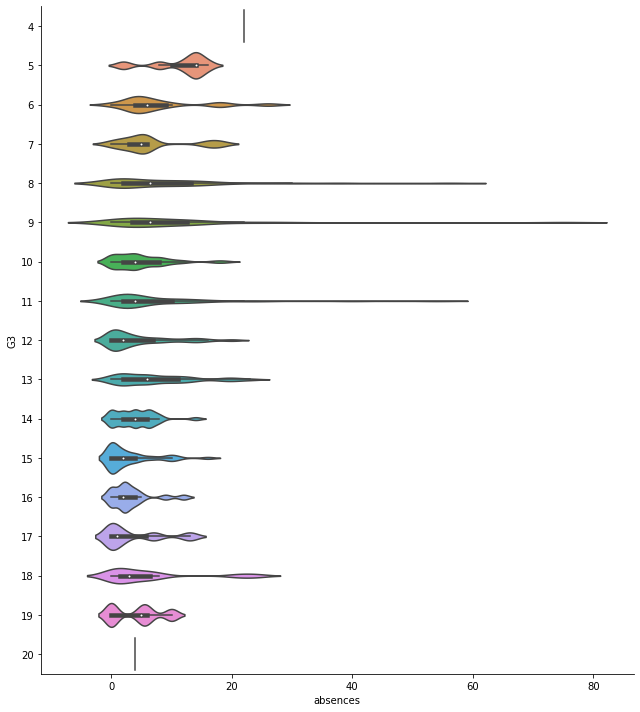

In [42]:
plt.figure(figsize = (15, 5))
sns.catplot(x = 'absences', y ='G3' , data = df, kind = "violin", bw = 0.25, height=10, aspect=.9, orient="h");
#Los que tienen mas faltas tienden a tener bajas notas

<AxesSubplot:>

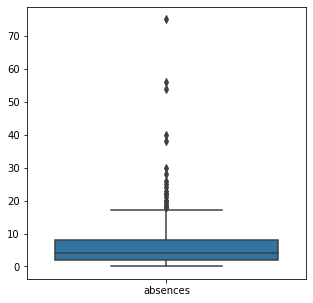

In [43]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = df[['absences']])

### freetime

In [44]:
df['freetime'].value_counts()

3    136
4    106
2     60
5     38
1     17
Name: freetime, dtype: int64

<Figure size 1440x360 with 0 Axes>

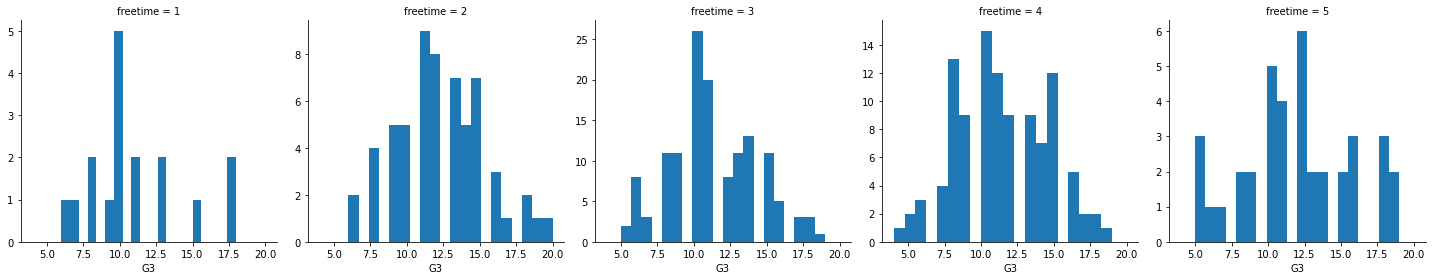

In [45]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='freetime', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

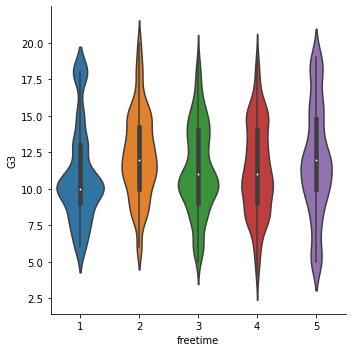

In [46]:

sns.catplot(x = 'freetime', y ='G3' , data = df, kind = "violin", bw = 0.25);


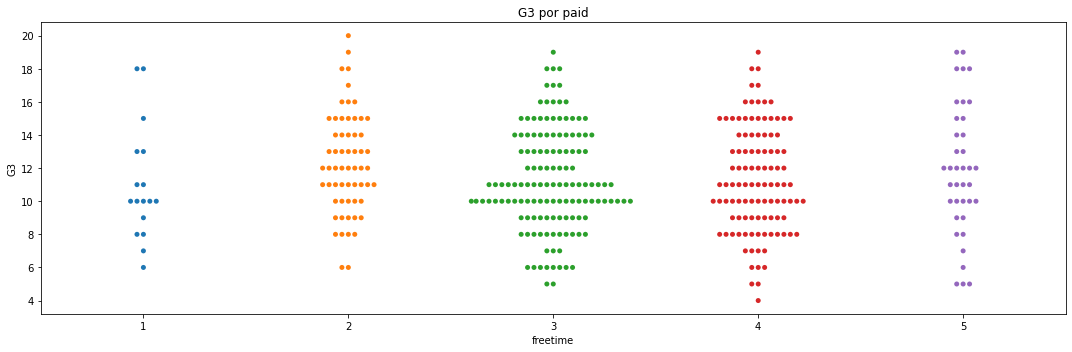

In [47]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='freetime', y='G3', data=df).set_title('G3 por paid')
plt.tight_layout()
plt.show()


### goout

In [48]:
df['goout'].value_counts()

3    122
2     94
4     77
5     45
1     19
Name: goout, dtype: int64

<Figure size 1440x360 with 0 Axes>

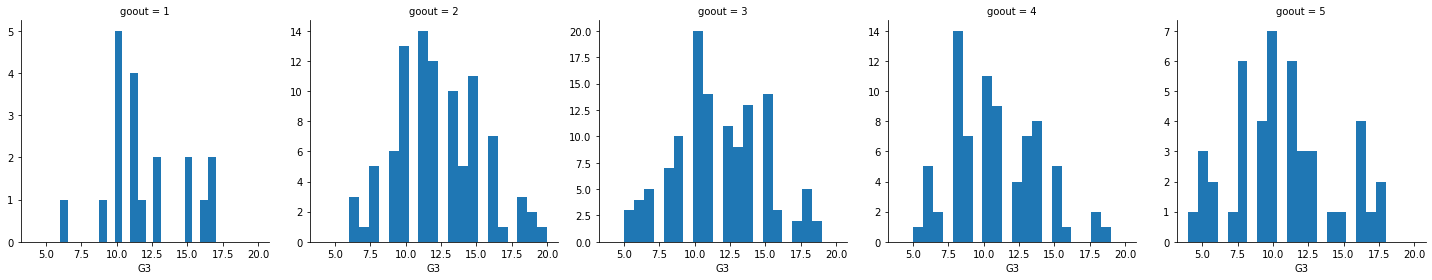

In [49]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='goout', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

### Dalc y Walc

In [50]:
df['Dalc'].value_counts()

1    250
2     64
3     25
5      9
4      9
Name: Dalc, dtype: int64

<Figure size 1440x360 with 0 Axes>

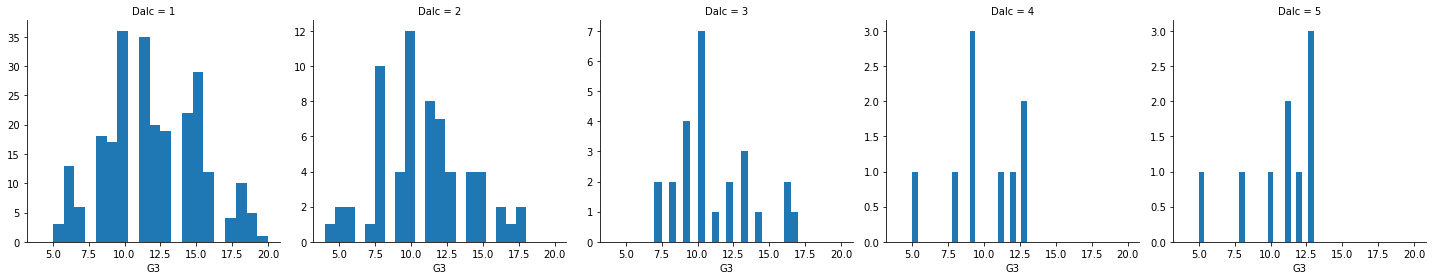

In [51]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='Dalc', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

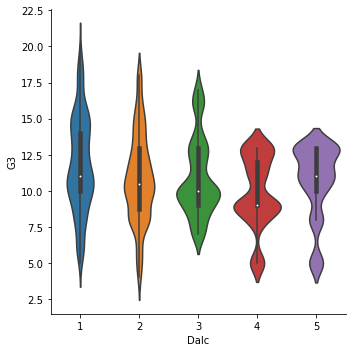

In [52]:
sns.catplot(x = 'Dalc', y ='G3' , data = df, kind = "violin", bw = 0.25);
#los que toman alcohol durante los días habiles tienen a tener tonas bajas

In [53]:
df['Walc'].value_counts()

1    133
3     77
2     73
4     48
5     26
Name: Walc, dtype: int64

<Figure size 1440x360 with 0 Axes>

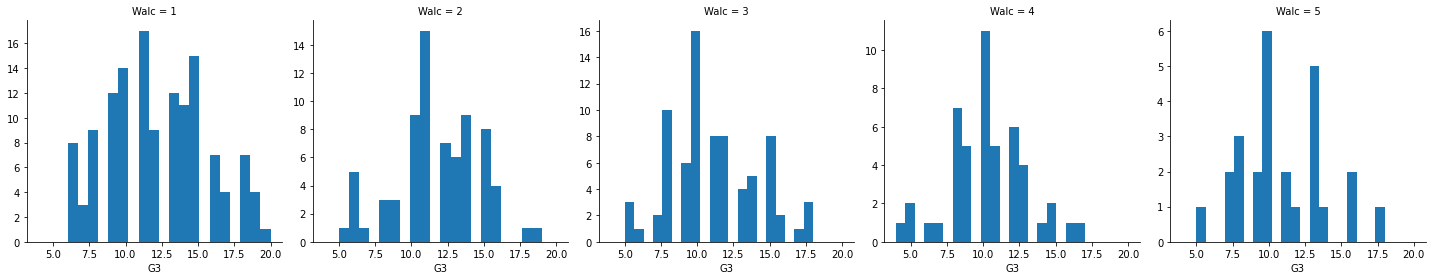

In [54]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='Walc', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

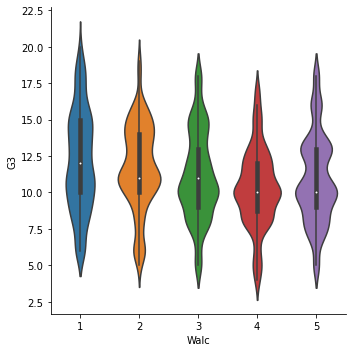

In [55]:
sns.catplot(x = 'Walc', y ='G3' , data = df, kind = "violin", bw = 0.25);
#los que más toman alcohol durante el findesemana tienen a tener tonas bajas

## Matriz de gráficos

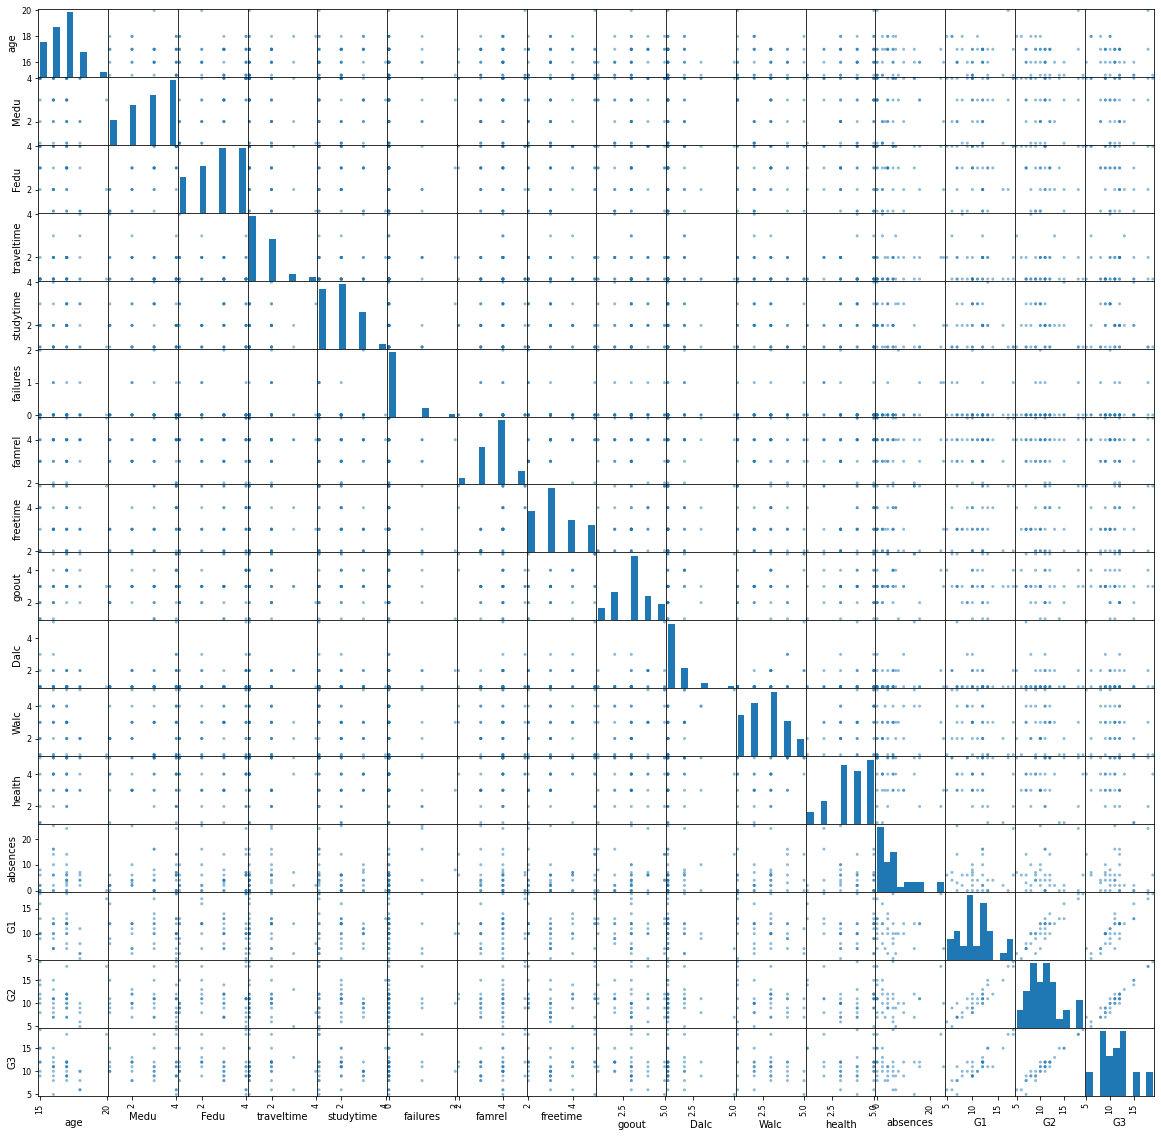

In [56]:
_=pd.plotting.scatter_matrix(df.iloc[::10], figsize=(20, 20), alpha=0.5)

## Matriz de correlacón

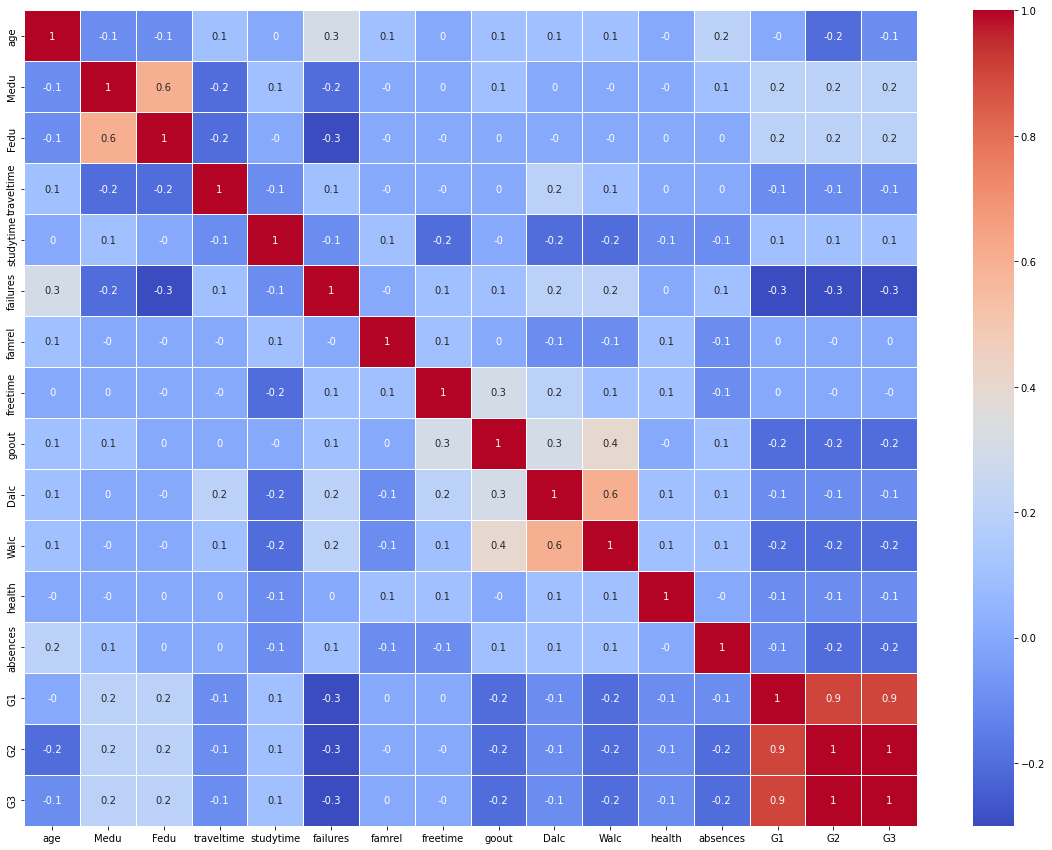

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.corr(),1), cmap="coolwarm", annot=True, linewidths=.5)

plt.show()

In [58]:
df.corr()['G3'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
G3            1.000000
Name: G3, dtype: float64

In [59]:
df.corr()['G3'].nlargest(5)

G3      1.000000
G2      0.965583
G1      0.891805
Medu    0.190308
Fedu    0.158811
Name: G3, dtype: float64

In [60]:
df.corr()['G3'].nsmallest(5)

failures   -0.293831
absences   -0.213129
Walc       -0.190054
goout      -0.177383
Dalc       -0.140690
Name: G3, dtype: float64

**Agrego al análisis a la variable "Medu" por la alta correlación con G3**

In [61]:
df['Medu'].value_counts()

4    125
3     90
2     89
1     50
0      3
Name: Medu, dtype: int64

<Figure size 1440x360 with 0 Axes>

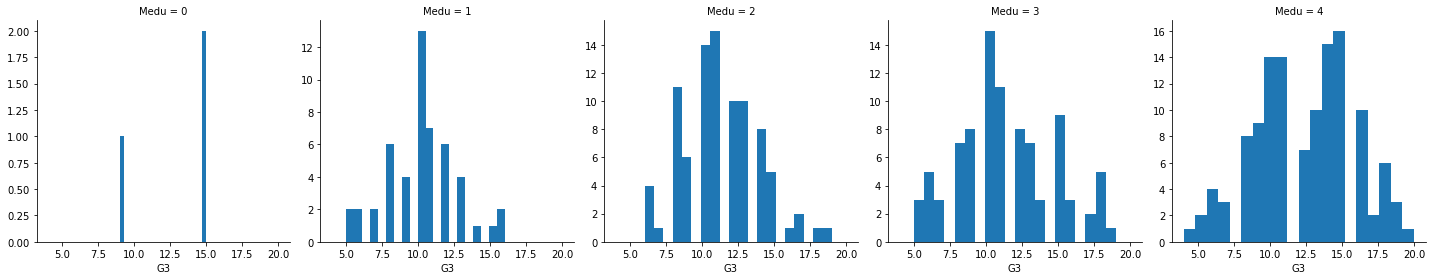

In [62]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='Medu', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

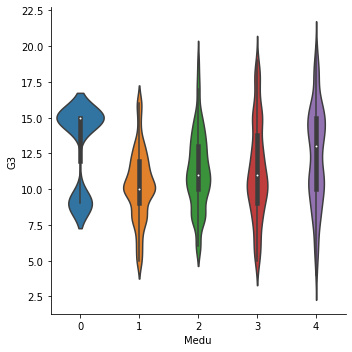

In [63]:
sns.catplot(x = 'Medu', y ='G3' , data = df, kind = "violin", bw = 0.25);
#los que tienen madres con estudios altos tienen a tener mejores notas

# Definion del dataset de entrenamiento y el Target

**En base al EDA y a la correlación se eleigieron las siguientes variables**

In [64]:
data= df[['Medu','studytime','failures','higher','Fjob','absences','Dalc','Walc','goout','schoolsup','famsup','G3']].copy().reset_index(drop=True)
target = df[['G3']].copy().reset_index(drop=True)
data

,Medu,studytime,failures,higher,Fjob,absences,Dalc,Walc,goout,schoolsup,famsup,G3
0,4,2,0,yes,teacher,6,1,1,4,yes,no,6
1,1,2,0,yes,other,4,1,1,3,no,yes,6
2,1,2,3,yes,other,10,2,3,2,yes,no,10
3,4,3,0,yes,services,2,1,1,2,no,yes,15
4,3,2,0,yes,other,4,1,2,2,no,yes,10
...,...,...,...,...,...,...,...,...,...,...,...,...
352,2,2,2,yes,services,11,4,5,4,no,yes,9
353,3,1,0,yes,services,3,3,4,5,no,no,16
354,1,1,3,yes,other,3,3,3,3,no,no,7
355,3,1,0,yes,other,0,3,4,1,no,no,10


In [65]:
target

,G3
0,6
1,6
2,10
3,15
4,10
...,...
352,9
353,16
354,7
355,10


In [66]:
#defino un pipeline para realizar el escalodo de datos y para los dummies
from sklearn.preprocessing import OneHotEncoder
pipeline_cat= Pipeline([
        ('dummies', OneHotEncoder(drop='first')),
        #('std_scaler', StandardScaler(with_mean=False))
    ])
pipeline_num= Pipeline([
        ('std_scaler', StandardScaler(with_mean=False))
    ])


In [67]:
#guardo los nombres de la variables categóricas y numéricas
numerical_columns = [x for x in data.columns if data[x].dtype != 'object' and data[x].dtype != 'bool']
cat_columns = [x for x in data.columns if x not in numerical_columns]
cat_columns

['higher', 'Fjob', 'schoolsup', 'famsup']

In [68]:
numerical_columns

['Medu', 'studytime', 'failures', 'absences', 'Dalc', 'Walc', 'goout', 'G3']

In [69]:
# separadp el df con las variables variables categóricas para dummies 
datapipe_cat = pipeline_cat.fit_transform(data[cat_columns]).toarray()
col= pipeline_cat.get_feature_names_out(cat_columns)
datapipe_cat = pd.DataFrame(data=datapipe_cat,columns=col)
datapipe_cat

,higher_yes,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
352,1.0,0.0,0.0,1.0,0.0,0.0,1.0
353,1.0,0.0,0.0,1.0,0.0,0.0,0.0
354,1.0,0.0,1.0,0.0,0.0,0.0,0.0
355,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
# separo el df con las variables num para aplicar el pipeline de escalado
datapipe_num=data[numerical_columns]
datapipe_num =  datapipe_num.drop(["G3"], axis=1)

In [71]:
datapipe_num

,Medu,studytime,failures,absences,Dalc,Walc,goout
0,4,2,0,6,1,1,4
1,1,2,0,4,1,1,3
2,1,2,3,10,2,3,2
3,4,3,0,2,1,1,2
4,3,2,0,4,1,2,2
...,...,...,...,...,...,...,...
352,2,2,2,11,4,5,4
353,3,1,0,3,3,4,5
354,1,1,3,3,3,3,3
355,3,1,0,0,3,4,1


## Solo se escalan las variables numéricas independientes NO se escala el target ni las categóricas

In [72]:
#aplico el pipeline de escalado a las variables num
X_scale = pipeline_num.fit_transform(datapipe_num)
col_num= pipeline_num.get_feature_names_out(datapipe_num.columns)
X_scale = pd.DataFrame(data=X_scale,columns=col_num)
X_scale

,Medu,studytime,failures,absences,Dalc,Walc,goout
0,3.661442,2.407523,0.000000,0.733842,1.088617,0.7733,3.672250
1,0.915361,2.407523,0.000000,0.489228,1.088617,0.7733,2.754187
2,0.915361,2.407523,4.472216,1.223070,2.177234,2.3199,1.836125
3,3.661442,3.611284,0.000000,0.244614,1.088617,0.7733,1.836125
4,2.746082,2.407523,0.000000,0.489228,1.088617,1.5466,1.836125
...,...,...,...,...,...,...,...
352,1.830721,2.407523,2.981477,1.345377,4.354468,3.8665,3.672250
353,2.746082,1.203761,0.000000,0.366921,3.265851,3.0932,4.590312
354,0.915361,1.203761,4.472216,0.366921,3.265851,2.3199,2.754187
355,2.746082,1.203761,0.000000,0.000000,3.265851,3.0932,0.918062


In [73]:
dataFinal= pd.concat([datapipe_cat, X_scale], axis = 1)

In [74]:
dataFinal

,higher_yes,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,Medu,studytime,failures,absences,Dalc,Walc,goout
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.661442,2.407523,0.000000,0.733842,1.088617,0.7733,3.672250
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.915361,2.407523,0.000000,0.489228,1.088617,0.7733,2.754187
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.915361,2.407523,4.472216,1.223070,2.177234,2.3199,1.836125
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.661442,3.611284,0.000000,0.244614,1.088617,0.7733,1.836125
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.746082,2.407523,0.000000,0.489228,1.088617,1.5466,1.836125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.830721,2.407523,2.981477,1.345377,4.354468,3.8665,3.672250
353,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.746082,1.203761,0.000000,0.366921,3.265851,3.0932,4.590312
354,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.915361,1.203761,4.472216,0.366921,3.265851,2.3199,2.754187
355,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.746082,1.203761,0.000000,0.000000,3.265851,3.0932,0.918062


### Train y Test

Una vez procesados los datos, divido en Train y Test

In [75]:
#independent Variable
X = dataFinal
y = target

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [77]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(249, 14) (249, 1)
(108, 14) (108, 1)


# Planteo un modelo de regresión

**Modelo 1 - Regresión Lineal**

In [78]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train) # Entenamiento

LinearRegression()

In [79]:
y_pred_test = linear.predict(x_test) # Predicción

In [80]:
#Métricas
from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test , y_pred_test))

R2 Score: 0.2633465753404748


In [81]:
coeff = pd.DataFrame(linear.coef_ ,columns=X.columns) # Coeficientes generados
coeff

,higher_yes,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,Medu,studytime,failures,absences,Dalc,Walc,goout
0,0.281961,-1.036451,-0.282427,0.066237,1.043106,-2.166425,-0.45331,0.429985,0.326073,-0.647209,-0.489599,0.049116,-0.322517,-0.288533


In [82]:
intercept = linear.intercept_
intercept

array([11.98875793])

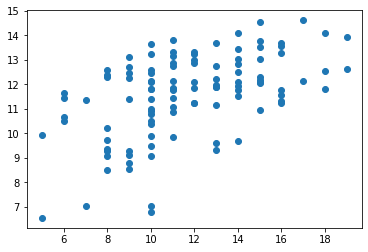

In [83]:
plt.scatter(y_test,y_pred_test) # gráficos mientras mas coinciden más lineal es

In [84]:
# métricas
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) # Nos quedamos con esta métrica porque se visualiza
#la distancia del resultado predicho con el real

MAE: 2.1944129944028115
MSE: 7.448384627112976
RMSE: 2.7291728833316835


**Cross validation**

In [85]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(linear,x_test,y_test,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
#This score is very good, since it's closer to zero. Model performs well when this value is closer to zero.

-8.618411462412148


## Regularización
Sabemos que el proceso real no se comprende por completo mediante un polinomio de grado finito. ¿Hay alguna manera de dar más flexibilidad al algoritmo PERO EVITANDO EL sobreajuste?.

La regularización es justmente eso: agregar un hiperparámetro que controla al modelo

**Modelo 2 - Ridge:** La regresión Ridge reduce los coeficientes introduciendo un término de penalización igual a la suma de coeficientes cuadrados por un coeficiente de penalización. Este coeficiente puede variar de 0 (sin penalización) a 1; el procedimiento buscará el "mejor" valor de penalización si especifica un rango e incremento.


Repetimos lo mismos pasos anteriores, añadiendo el gridsearch

Una forma de regularizar un modelo es agregar hiperparametros a la funcion de error.Esto es lo que hace el Modelo ***RIDGE*** .
Función de error del ajuste lineal:
$$
MSE(\boldsymbol{\omega}) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2\;\;.
$$
Función de error modificada:

$$
E_\text{ridge}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M \omega_i^2\;\;, 
$$
donde $\lambda$ se llama el término de regularización (o de penalización)

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={
    'alpha':[0.0001,0.001,0.01,0.1,0,1,5,10,50,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 5, 10, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [87]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-9.103511854224783


In [88]:
ridge=Ridge(alpha = 100)
ridge.fit(x_train, y_train)

Ridge(alpha=100)

In [89]:
prediction_ridge=ridge.predict(x_test)

In [90]:
# Lets take a look at how well this model preforms


print('R2 Score:',r2_score(y_test , prediction_ridge))


R2 Score: 0.20703114878415085


In [91]:
ridge.coef_[0]

array([ 0.03769584, -0.11279536, -0.07551531,  0.03209431,  0.14051318,
       -0.47992034, -0.14958659,  0.34992791,  0.23160897, -0.50805935,
       -0.38568751, -0.06945767, -0.17787494, -0.24856579])

In [92]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge))) # Nos quedamos con esta métrica porque se visualiza
#la distancia del resultado predicho con el real

MAE: 2.303183041087437
MSE: 8.017796162293584
RMSE: 2.8315713238930753


In [93]:

mse=cross_val_score(ridge,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-9.168871110274893


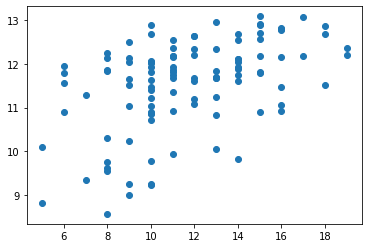

In [94]:
plt.scatter(y_test,prediction_ridge)

**Modelo 3 - Lasso:** La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno.

Repetimos lo mismos pasos anteriores.

LASSO es otro algoritmo de regularización, que naturalmente selecciona las variables más relevantes y produce modelos más parsimoniosos.
 
$$
E_\text{lasso}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M |\omega_i|\;\;, 
$$

donde hemos vuelto a introducir el hiperparámetro $\lambda$ para controlar el nivel de penalización.

In [95]:
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.1}
-8.99864988868177


In [96]:
lasso_grid = lasso_regressor.best_estimator_ 

In [97]:
lasso_grid.fit(x_train,y_train) # Entrenamiento con los mejores parámetros

Lasso(alpha=0.1)

In [98]:
prediction_lasso=lasso_grid.predict(x_test) # Predicción con los mejores parámetros


In [99]:

print('R2 Entrenamiento:', r2_score(y_train, lasso_grid.predict(x_train)))
print('R2 Score-Testeo:',r2_score(y_test , prediction_lasso))


R2 Entrenamiento: 0.19638256122713316
R2 Score-Testeo: 0.22348339742542278


In [100]:

print('MAE Entrenamiento:', metrics.mean_absolute_error(y_train, lasso_grid.predict(x_train)))
print('MSE Entrenamiento:', metrics.mean_squared_error(y_train, lasso_grid.predict(x_train)))
print('RMSE Entrenamiento:', np.sqrt(metrics.mean_squared_error(y_train, lasso_grid.predict(x_train))))# Nos quedamos con esta métrica porque se visualiza
#la distancia del resultado predicho con el real

MAE Entrenamiento: 2.3461456851785956
MSE Entrenamiento: 8.436006499327922
RMSE Entrenamiento: 2.9044804181347


In [101]:

print('MAE Testeo:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE Testeo:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE Testeo:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))# Nos quedamos con esta métrica porque se visualiza
#la distancia del resultado predicho con el real

MAE Testeo: 2.279021444655262
MSE Testeo: 7.8514456482540576
RMSE Testeo: 2.8020431203416654


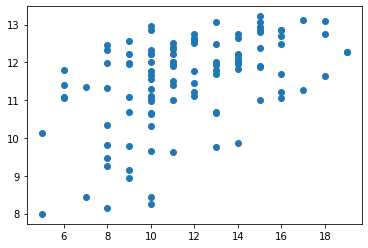

In [102]:
plt.scatter(y_test,prediction_lasso)

**Modelo 4 - Lasso con polinomio**

Repetimos lo mismos pasos anteriores.

In [103]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

def lasso(m, lam):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Lasso(alpha = lam/2.0, fit_intercept=False))])

# Fit Ridge
rr = lasso(1, 0.1)

parameters = {'poly_features__degree' : range(1,3), "regressor__alpha":  [0.0001,0.001,0.01,0.1,1,5,10,20,30,35,40,45,50,55,100]  }
folds = 4
param_comb = 150
grid_search = RandomizedSearchCV(rr, parameters,n_iter=param_comb,n_jobs=4, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 30 is smaller than n_iter=150. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly_features',
                                              PolynomialFeatures(degree=1)),
                                             ('regressor',
                                              Lasso(alpha=0.05,
                                                    fit_intercept=False))]),
                   n_iter=150, n_jobs=4,
                   param_distributions={'poly_features__degree': range(1, 3),
                                        'regressor__alpha': [0.0001, 0.001,
                                                             0.01, 0.1, 1, 5,
                                                             10, 20, 30, 35, 40,
                                                             45, 50, 55, 100]},
                   scoring='neg_mean_squared_error')

In [104]:
print(grid_search.best_params_) # Los mejores parámetros y score
print(grid_search.best_score_)

{'regressor__alpha': 0.1, 'poly_features__degree': 1}
-9.160499404465698


In [105]:
lasso_best = grid_search.best_estimator_ 


In [106]:
lasso_best.fit(x_train,y_train) # Entrenamiento con los mejores parámetros

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=1)),
                ('regressor', Lasso(alpha=0.1, fit_intercept=False))])

In [107]:
prediction_Plasso= lasso_best.predict(x_test) # predicción testeo

In [108]:

print('R2 Score de Entrenamiento: ',r2_score(y_train,lasso_best.predict(x_train)))
print('R2 Score de Testeo:',r2_score(y_test , prediction_Plasso))

R2 Score de Entrenamiento:  0.1703455980519809
R2 Score de Testeo: 0.15730674771434205


In [109]:
print('Testeo MAE:', metrics.mean_absolute_error(y_test, prediction_Plasso))
print('Testeo MSE:', metrics.mean_squared_error(y_test, prediction_Plasso))
print('Testeo RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_Plasso)))

Testeo MAE: 2.3606996358950374
Testeo MSE: 8.520565106443874
Testeo RMSE: 2.919000703399003


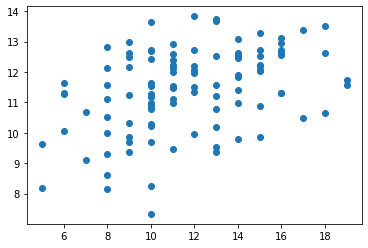

In [110]:
plt.scatter(y_test,prediction_Plasso)

##  Modelo 5 - XGBoost Regressor

Repetimos lo mismos pasos anteriores.

In [111]:
from xgboost import XGBRegressor

In [112]:
xgbr = XGBRegressor()

xgbr_parameters = {
    'learning_rate': [0.0001,0.001,0.01,0.1,1],
    'n_estimators' : [100, 1000],
    'max_depth' : [3,7]
}

grid_search = GridSearchCV(xgbr, param_grid = xgbr_parameters)

grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 7], 'n_estimators': [100, 1000]})

In [113]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
0.004407636341323462


In [114]:
xgbr_best = grid_search.best_estimator_


In [115]:
xgbr_best.fit(x_train,y_train) # Entrenamiento

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [120]:
prediction_xgbr= xgbr_best.predict(x_test) # predicción testeo

In [117]:

print('R2 Score de Entrenamiento: ',r2_score(y_train,xgbr_best.predict(x_train))) # va entre 0 y 1, cercano a 1 es mejor
print('R2 Score de Testeo:',r2_score(y_test , prediction_xgbr)) # (Coeficiente de determinación - OJO! no aplica para modelos de regresión no lineales, muchas circunstancia es = a la correlación y esta es una medida lineal
#VER https://www.youtube.com/watch?v=9IZ6OPQWtpw&ab_channel=C%C3%B3digoM%C3%A1quina 

R2 Score de Entrenamiento:  0.5748087415081391
R2 Score de Testeo: 0.2591116912741944


In [118]:

print('Testeo MAE:', metrics.mean_absolute_error(y_test, prediction_xgbr))
print('Testeo MSE:', metrics.mean_squared_error(y_test, prediction_xgbr))
print('Testeo RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))

Testeo MAE: 2.1703527724301375
Testeo MSE: 7.4912040104498105
Testeo RMSE: 2.7370063957634096


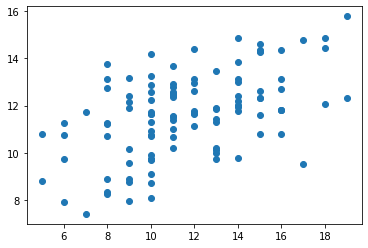

In [119]:
plt.scatter(y_test,prediction_xgbr)

# Los modelos de regresión se evaluan bajo la perspectiva del dominio en el cual se encuentran desplegagos